<a href="https://colab.research.google.com/github/Yughie/Mastering-Machine-Learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02. Neural Network classification with Pytorch

Classification is a problem of predicting wehether something is one thing or another (there can be multiple things as the option)

https://www.learnpytorch.io/02_pytorch_classification/

# 1. Make classification data ang get it ready



In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples

n_samples = 1000

#create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"first 5 sample of X: \n {X[:5]}")
print(f"first 5 sample of y: \n {y[:5]}")

first 5 sample of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 sample of y: 
 [1 1 1 1 0]


In [5]:
# Make dataFrame of circle data

import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


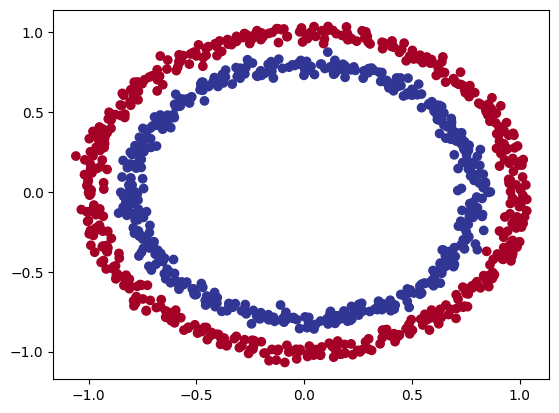

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)



Note: The Data were working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable to practice and learn the fundamental

In [7]:
# View the first example of features and label

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X:: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sampple of X: {X_sample.shape} and shape for y:--------------------- {y_sample.shape}")

Values for one sample of X:: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sampple of X: (2,) and shape for y:--------------------- ()


# 1.2 Turn data into tensors and create train and test splits

In [8]:
import torch
torch.__version__


'2.5.1+cu121'

In [9]:
type(X)

numpy.ndarray

In [10]:
# Turn data into tensors(X is in a numpy)

X  = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [12]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #0.2 = 20% of data will be test & 80 will be train data
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

1. Setup device agonistic code so our code will run on an accelerator if the is one
2. Construct a model (by subclassing 'nn.Module')
3. define a loss function and optimizer
4. create a training and test loop

In [13]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [14]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.module` (almost all model in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` Layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation ) of the model
4. Instantiate an instance of our model class and send it to the target device

In [15]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module) :
  def __init__(self):
    super().__init__()
    # 2. Create nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=1) # Takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layers and output a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
      return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=1, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# let's replicate the model above using nn.Sequncial()

model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3047,  0.6188],
                      [-0.2093,  0.0426],
                      [ 0.6207,  0.0274],
                      [-0.2305, -0.6690],
                      [-0.5958,  0.3722]])),
             ('0.bias', tensor([-0.3765, -0.5213, -0.5166,  0.5454, -0.5281])),
             ('1.weight',
              tensor([[-0.0833, -0.0508, -0.1050, -0.2451,  0.4004]])),
             ('1.bias', tensor([0.1155]))])

In [18]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape} ")
print(f"Lnegth of prediction: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 actual values: {y_test[:10]}")

Length of test samples: 200, Shape: torch.Size([200, 2]) 
Lnegth of prediction: 200, Shape: torch.Size([200, 1])
First 10 predictions: tensor([[ 0.1368],
        [ 0.1254],
        [-0.0498],
        [ 0.1905],
        [-0.3932],
        [-0.3975],
        [-0.1573],
        [-0.2806],
        [-0.0350],
        [ 0.1208]])
First 10 actual values: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Set up loss function and optimizer

which loss function or optimizer should you use?

again ... this is problem specific

for example for regression you might want to use MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

as a reminder, the loss function measures how *wrong* your models prediction are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in optimizer options


* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()` for more on what binary cross entropy (BCE) is.
* For different optimizer see torch.optim

In [19]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



In [20]:
# Calculate accuracy - out of 100 example, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

3. Train Model

To train our model, were goign to need to build a training loop with the following steps:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropogation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> rediction probabilities -> prediction labels

ourmodel output are going to be raw **logits**

we can convert **logits** into prediction probabilities by passing them to some kind of activation function (e.g sigmoid for binary classification  and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction label** by either rounding them or taking the argmax().

In [21]:
#View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1368],
        [ 0.1254],
        [-0.0498],
        [ 0.1905],
        [-0.3932]])

In [22]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [23]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5341],
        [0.5313],
        [0.4876],
        [0.5475],
        [0.4029]])

For our prediction values we need to perform a range-style round on them:
* y_preds_probability >= 0.5, y = 1 (class 1)
* y_preds_probability < 0.5, y = 0  (class 0)

In [24]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))


# Check for equlity

print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))
y_preds.squeeze()

print(f"Y_preds: {y_preds}")
print(f"Y_preds_labels: {y_preds_labels}")

tensor([True, True, True, True, True])
Y_preds: tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.]])
Y_preds_labels: tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)


In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a Training and testing loop

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of the epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels


  # 2. Calculate the loss/accuracy

  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward (backpropogation)
  loss.backward()

  # 5. Optimizer step (gradient descent - update the parameters to reduce the gradients )
  optimizer.step()


## TESTING

  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_0(X_test).squeeze().to(device)
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69331 | Acc: 50.88% | Test Loss: 0.69541 | Test Acc: 49.00%
Epoch: 10 | Loss: 0.69324 | Acc: 50.88% | Test Loss: 0.69532 | Test Acc: 49.00%
Epoch: 20 | Loss: 0.69319 | Acc: 50.75% | Test Loss: 0.69524 | Test Acc: 47.50%
Epoch: 30 | Loss: 0.69314 | Acc: 50.75% | Test Loss: 0.69518 | Test Acc: 47.50%
Epoch: 40 | Loss: 0.69311 | Acc: 50.88% | Test Loss: 0.69512 | Test Acc: 47.50%
Epoch: 50 | Loss: 0.69308 | Acc: 51.50% | Test Loss: 0.69508 | Test Acc: 48.50%
Epoch: 60 | Loss: 0.69306 | Acc: 51.00% | Test Loss: 0.69504 | Test Acc: 47.50%
Epoch: 70 | Loss: 0.69304 | Acc: 51.38% | Test Loss: 0.69500 | Test Acc: 47.00%
Epoch: 80 | Loss: 0.69303 | Acc: 51.12% | Test Loss: 0.69497 | Test Acc: 46.50%
Epoch: 90 | Loss: 0.69302 | Acc: 50.88% | Test Loss: 0.69495 | Test Acc: 46.00%
Epoch: 100 | Loss: 0.69301 | Acc: 50.88% | Test Loss: 0.69492 | Test Acc: 47.00%
Epoch: 110 | Loss: 0.69301 | Acc: 51.12% | Test Loss: 0.69490 | Test Acc: 47.00%
Epoch: 120 | Loss: 0.69300 | Acc: 51.00

In [40]:
print(f"y_logits shape: {y_logits.shape}")
print(f"y_train shape: {y_train.shape}")

y_logits shape: torch.Size([800])
y_train shape: torch.Size([800])


## 4. Make predicition and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some prediction and make them visual!

in other words, "Visualize, visualize, visualize"

To do so, were going to import a function called plot_decision_boundary() - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [41]:
import requests
from pathlib import Path


#Download helper function from Learn PyTorch repo (if it's not already downloaded)

if Path("helper_function.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

helper_function.py already exists, skipping download


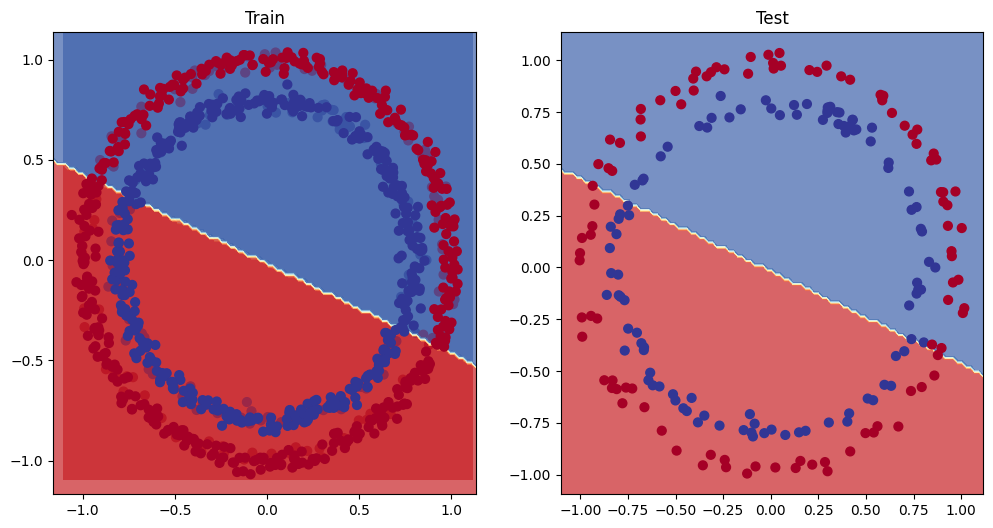

In [42]:
# Plot decision boundary of the model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_0, X_test, y_test)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)